# Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
train = pd.read_csv("train.csv")

In [82]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<AxesSubplot:>

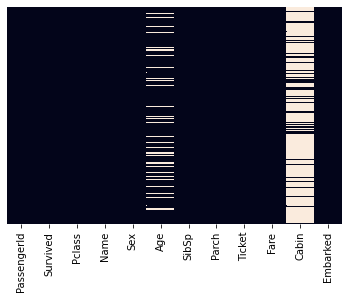

In [15]:
sns.heatmap(train.isnull(),yticklabels=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

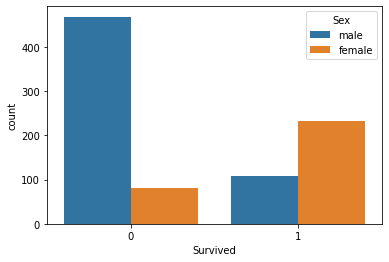

In [22]:
sns.countplot(x ="Survived",hue="Sex",data = train)

<AxesSubplot:xlabel='Survived', ylabel='count'>

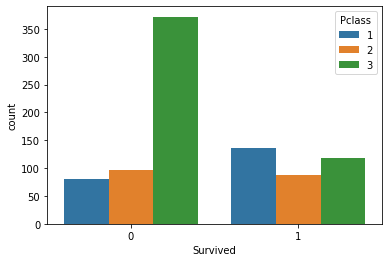

In [25]:
sns.countplot("Survived",hue ="Pclass",data = train)

In [26]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
Step 1 : Removing the null values

<AxesSubplot:>

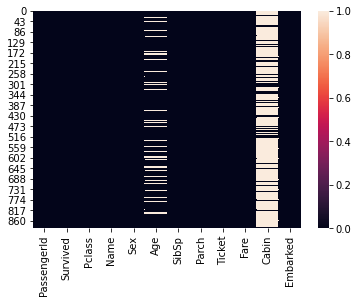

In [27]:
sns.heatmap(train.isnull())

In [89]:
train.drop("Cabin",axis = 1,inplace=True)

<AxesSubplot:>

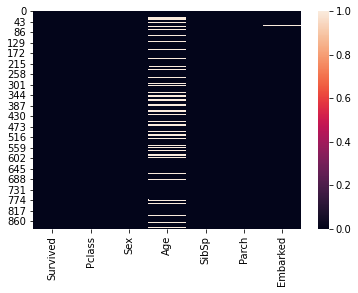

In [70]:
sns.heatmap(train.isnull())

In [84]:
train.drop("PassengerId",axis=1,inplace=True)

In [85]:
train.drop("Ticket",axis = 1,inplace=True)

In [86]:
train.drop("Name",axis = 1,inplace = True)

In [87]:
train.drop("Fare",axis = 1,inplace = True)

In [90]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


<AxesSubplot:xlabel='Pclass', ylabel='Age'>

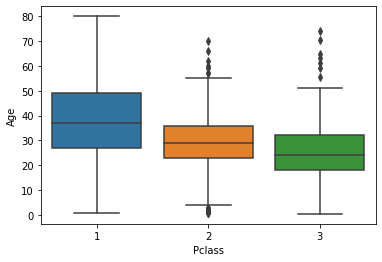

In [65]:
sns.boxplot(x="Pclass",y="Age",data = train)

<AxesSubplot:xlabel='Parch', ylabel='count'>

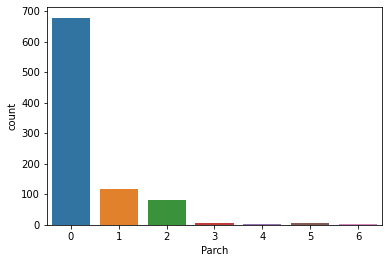

In [69]:
sns.countplot(x="Parch",data=train)

In [92]:
def Age_nullreplacer(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 38
        elif Pclass == 2:
            return 29
        else:
            return 23
    else:
        return Age

In [93]:
train["Age"] = train[["Age","Pclass"]].apply(Age_nullreplacer,axis = 1)

<AxesSubplot:>

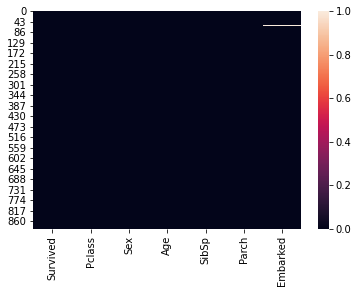

In [94]:
sns.heatmap(train.isnull())

In [76]:
train["Embarked"]


0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [95]:
train.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Embarked    2
dtype: int64

In [96]:
train["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [105]:
train

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,23.0,1,2,S
889,1,1,male,26.0,0,0,C


<AxesSubplot:xlabel='Embarked', ylabel='count'>

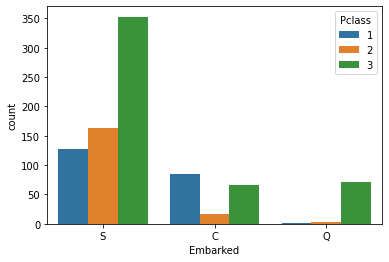

In [110]:
sns.countplot(x ="Embarked",data= train,hue="Pclass")

In [117]:
train.dropna(inplace=True)
    

<AxesSubplot:>

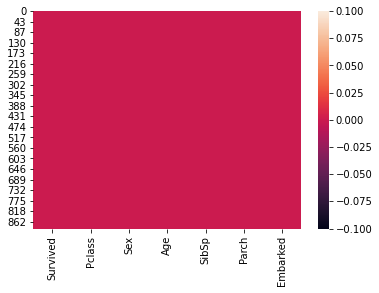

In [122]:
sns.heatmap(data =train.isnull())


In [129]:
embarked = pd.get_dummies(train['Embarked'],drop_first=True)

In [130]:
sex = pd.get_dummies(train["Sex"],drop_first=True)

In [135]:
train = pd.concat([train,sex,embarked],axis = 1)

In [138]:
train.drop("Sex",inplace=True,axis = 1)

In [140]:
train.drop("Embarked",axis = 1,inplace = True)

In [141]:
train

,Survived,Pclass,Age,SibSp,Parch,male,Q,S
0,0,3,22.0,1,0,1,0,1
1,1,1,38.0,1,0,0,0,0
2,1,3,26.0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,1
4,0,3,35.0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
886,0,2,27.0,0,0,1,0,1
887,1,1,19.0,0,0,0,0,1
888,0,3,23.0,1,2,0,0,1
889,1,1,26.0,0,0,1,0,0
